In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [3]:
data=pd.read_csv("C:/Users/Vasanth/OneDrive/Desktop/DiabetesPrediction1/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


INFO ABOUT THE DATA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Pregnancies**: Number of times pregnant.
**Glucose**: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
**BloodPressure**: Diastolic blood pressure (mm Hg).
**SkinThickness**: Triceps skin fold thickness (mm).
**Insulin**: 2-Hour serum insulin (mu U/ml).
**BMI**: Body mass index (weight in kg/(height in m)^2).
**DiabetesPedigreeFunction**: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history).
**Age**: Age (years).
**Outcome**: Class variable (0 or 1) indicating whether the person has diabetes or not.

In [5]:
data.shape

(768, 9)

In [6]:
print(data.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
print(data.duplicated().sum())

0


In [9]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Descriptive Analysis

In [10]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [11]:
data['Age'].max()

81

In [12]:
data["Pregnancies"].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [13]:
data["Glucose"].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [14]:
data["BloodPressure"].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [15]:
data["SkinThickness"].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [16]:
data["Insulin"].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [17]:
data["BMI"].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [18]:
data["DiabetesPedigreeFunction"].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [19]:
data["Age"].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [20]:
data["Outcome"].describe()


count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


<Axes: >

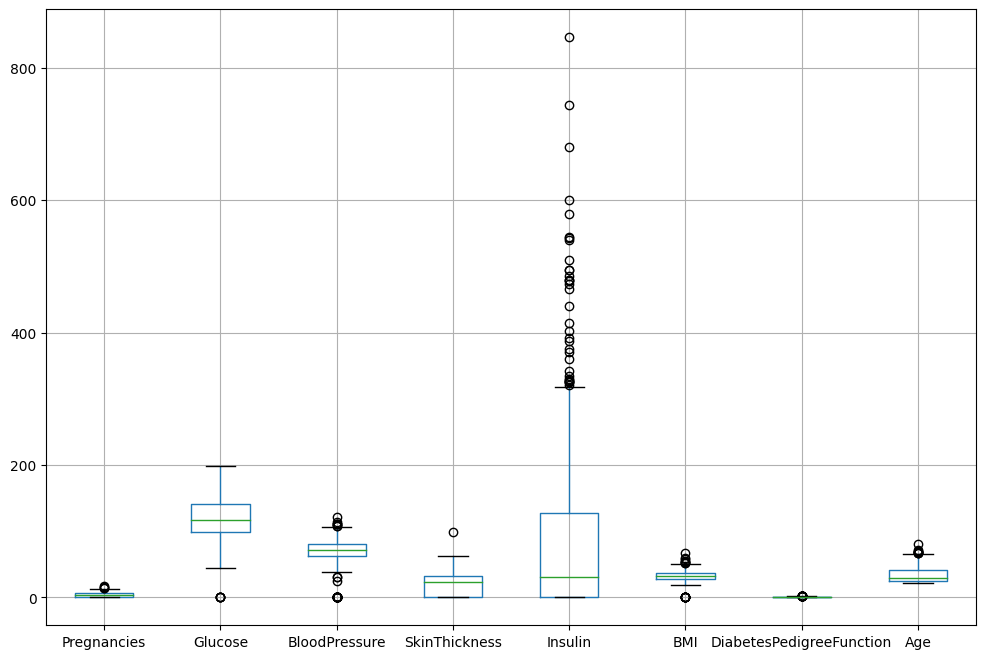

In [21]:
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

print(numerical_columns)


data[numerical_columns].boxplot(figsize=(12, 8))


In [22]:
# Calculate quartiles and IQR
Q1 = data["Insulin"].quantile(0.25)
Q3 = data["Insulin"].quantile(0.75)
IQR = Q3 - Q1
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter rows within the IQR
data = data[(data["Insulin"] >= lower_bound) & (data["Insulin"] <= upper_bound)]


In [23]:
sns.boxplot(data["Insulin"])

<Axes: >

**EDA Process**

In [24]:
def custom_summary_statistics(data):
    summary_stats = {}
    # Count
    summary_stats['count'] = data.count()
    # Mean
    summary_stats['mean'] = data.mean()
     # Median 
    summary_stats['Median'] = data.median()
    # Mode
    summary_stats['mode'] = data.mode().iloc[0]
    
    # Standard Deviation
    summary_stats['std'] = data.std()
     # Variance
    summary_stats['variance'] = data.var()
     # Maximum
    summary_stats['max'] = data.max()
    # Minimum
    summary_stats['min'] = data.min()
    # Range
    summary_stats['range'] = summary_stats['max'] - summary_stats['min']
    # 25th percentile (Q1)
    summary_stats['25%'] = data.quantile(0.25)
    # 75th percentile (Q3)
    summary_stats['75%'] = data.quantile(0.75)
    # Interquartile Range (IQR)
    summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']
    # Absolute Deviation
    summary_stats['abs_dev'] = (data - data.mean()).abs().mean()
    # Coefficient of Variation (CV)
    summary_stats['CV'] = summary_stats['std'] / summary_stats['mean']
    
    # Skewness
    summary_stats['skew'] = data.skew()
    # Distance skewness
    summary_stats['dist_skew'] = (3 * (data.mean() - data.median())) / data.std()
    # Kurtosis
    summary_stats['kurtosis'] = data.kurtosis()

    return pd.DataFrame(summary_stats)
    
summary = custom_summary_statistics(data)
print(summary)


                          count        mean   Median    mode        std  \
Pregnancies                 734    3.841962    3.000   1.000   3.383143   
Glucose                     734  119.182561  115.000  99.000  31.266437   
BloodPressure               734   68.990463   72.000  70.000  19.613487   
SkinThickness               734   19.985014   22.000   0.000  15.951788   
Insulin                     734   62.328338    0.000   0.000  79.132557   
BMI                         734   31.854087   32.000  32.000   7.919395   
DiabetesPedigreeFunction    734    0.466918    0.368   0.254   0.322066   
Age                         734   33.185286   29.000  22.000  11.714824   
Outcome                     734    0.339237    0.000   0.000   0.473773   

                             variance     max     min    range       25%  \
Pregnancies                 11.445658   17.00   0.000   17.000   1.00000   
Glucose                    977.590091  199.00   0.000  199.000  99.00000   
BloodPressure        

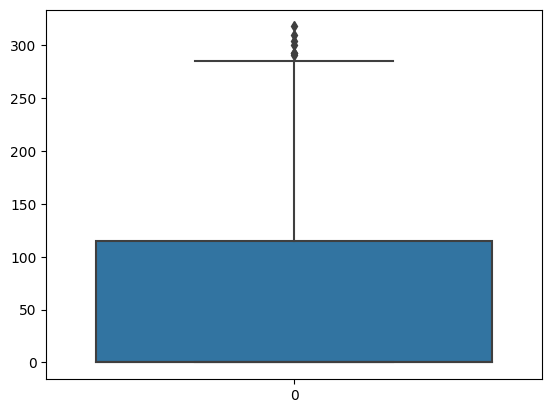

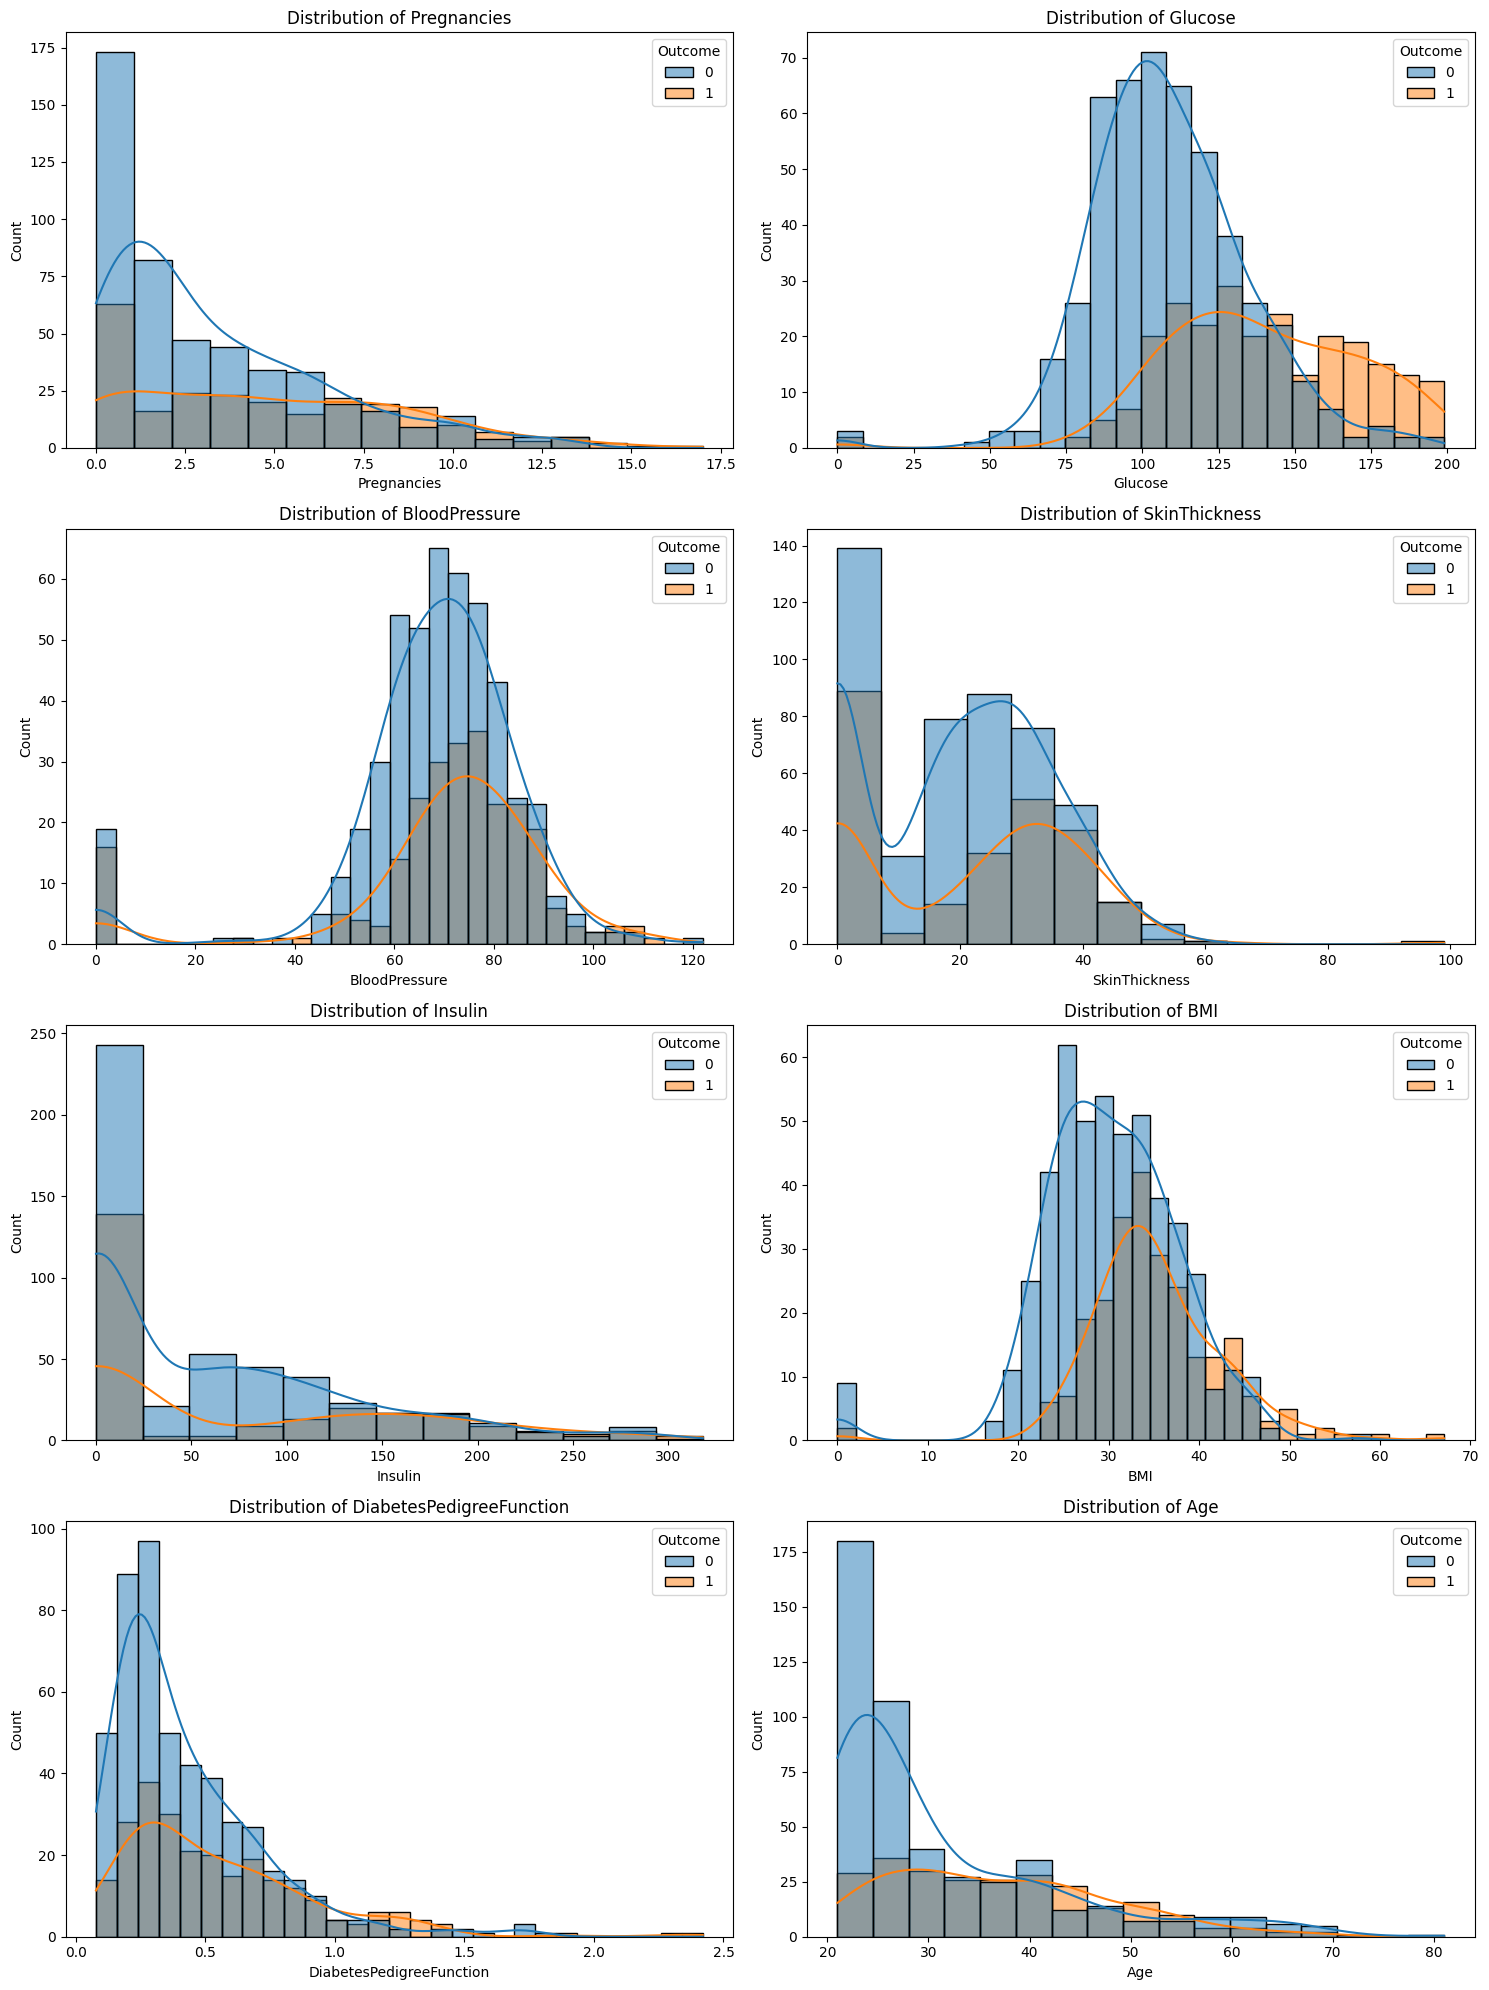

In [25]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Iterate through each column for EDA
for i, col in enumerate(data.columns[:-1]):  # Exclude the 'Outcome' column
    sns.histplot(data=data, x=col, hue='Outcome', kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

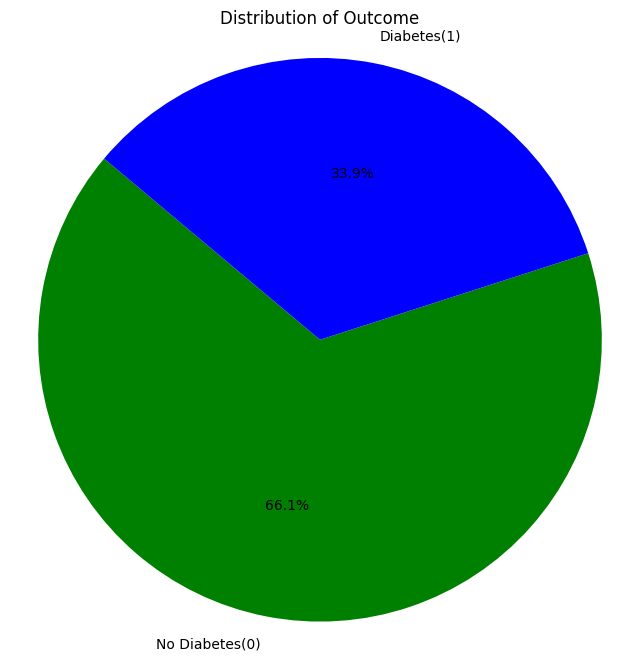

In [26]:
outcome_counts = data['Outcome'].value_counts()

# Define the labels and colors
labels = ['No Diabetes(0)', 'Diabetes(1)']
colors = ['green', 'blue']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Outcome')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

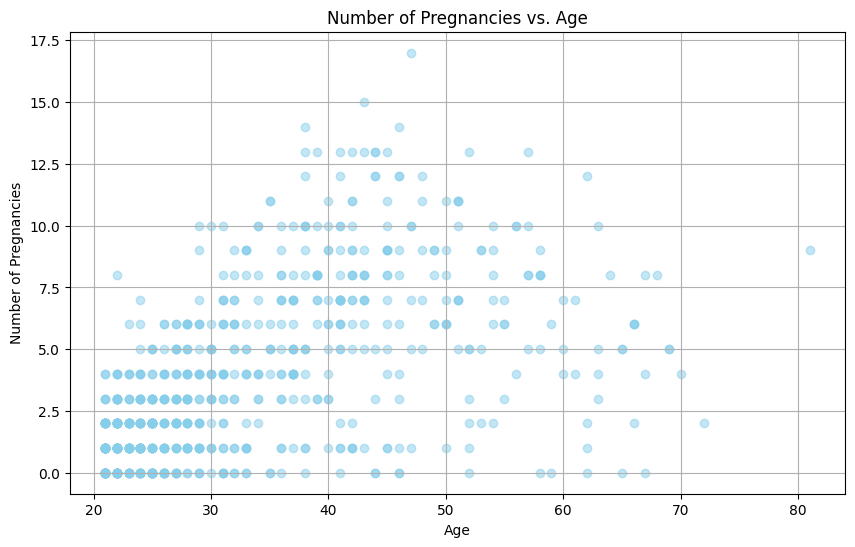

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Pregnancies'], color='skyblue', alpha=0.5)
plt.title('Number of Pregnancies vs. Age')
plt.xlabel('Age')
plt.ylabel('Number of Pregnancies')
plt.grid(True)
plt.show()

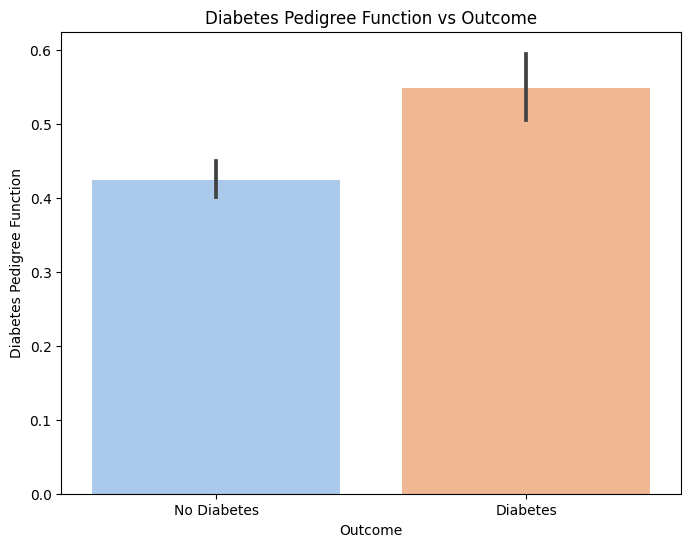

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='DiabetesPedigreeFunction', data=data, palette='pastel')
plt.title('Diabetes Pedigree Function vs Outcome')
plt.xlabel('Outcome')
plt.ylabel('Diabetes Pedigree Function')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()

<Figure size 1500x1500 with 0 Axes>

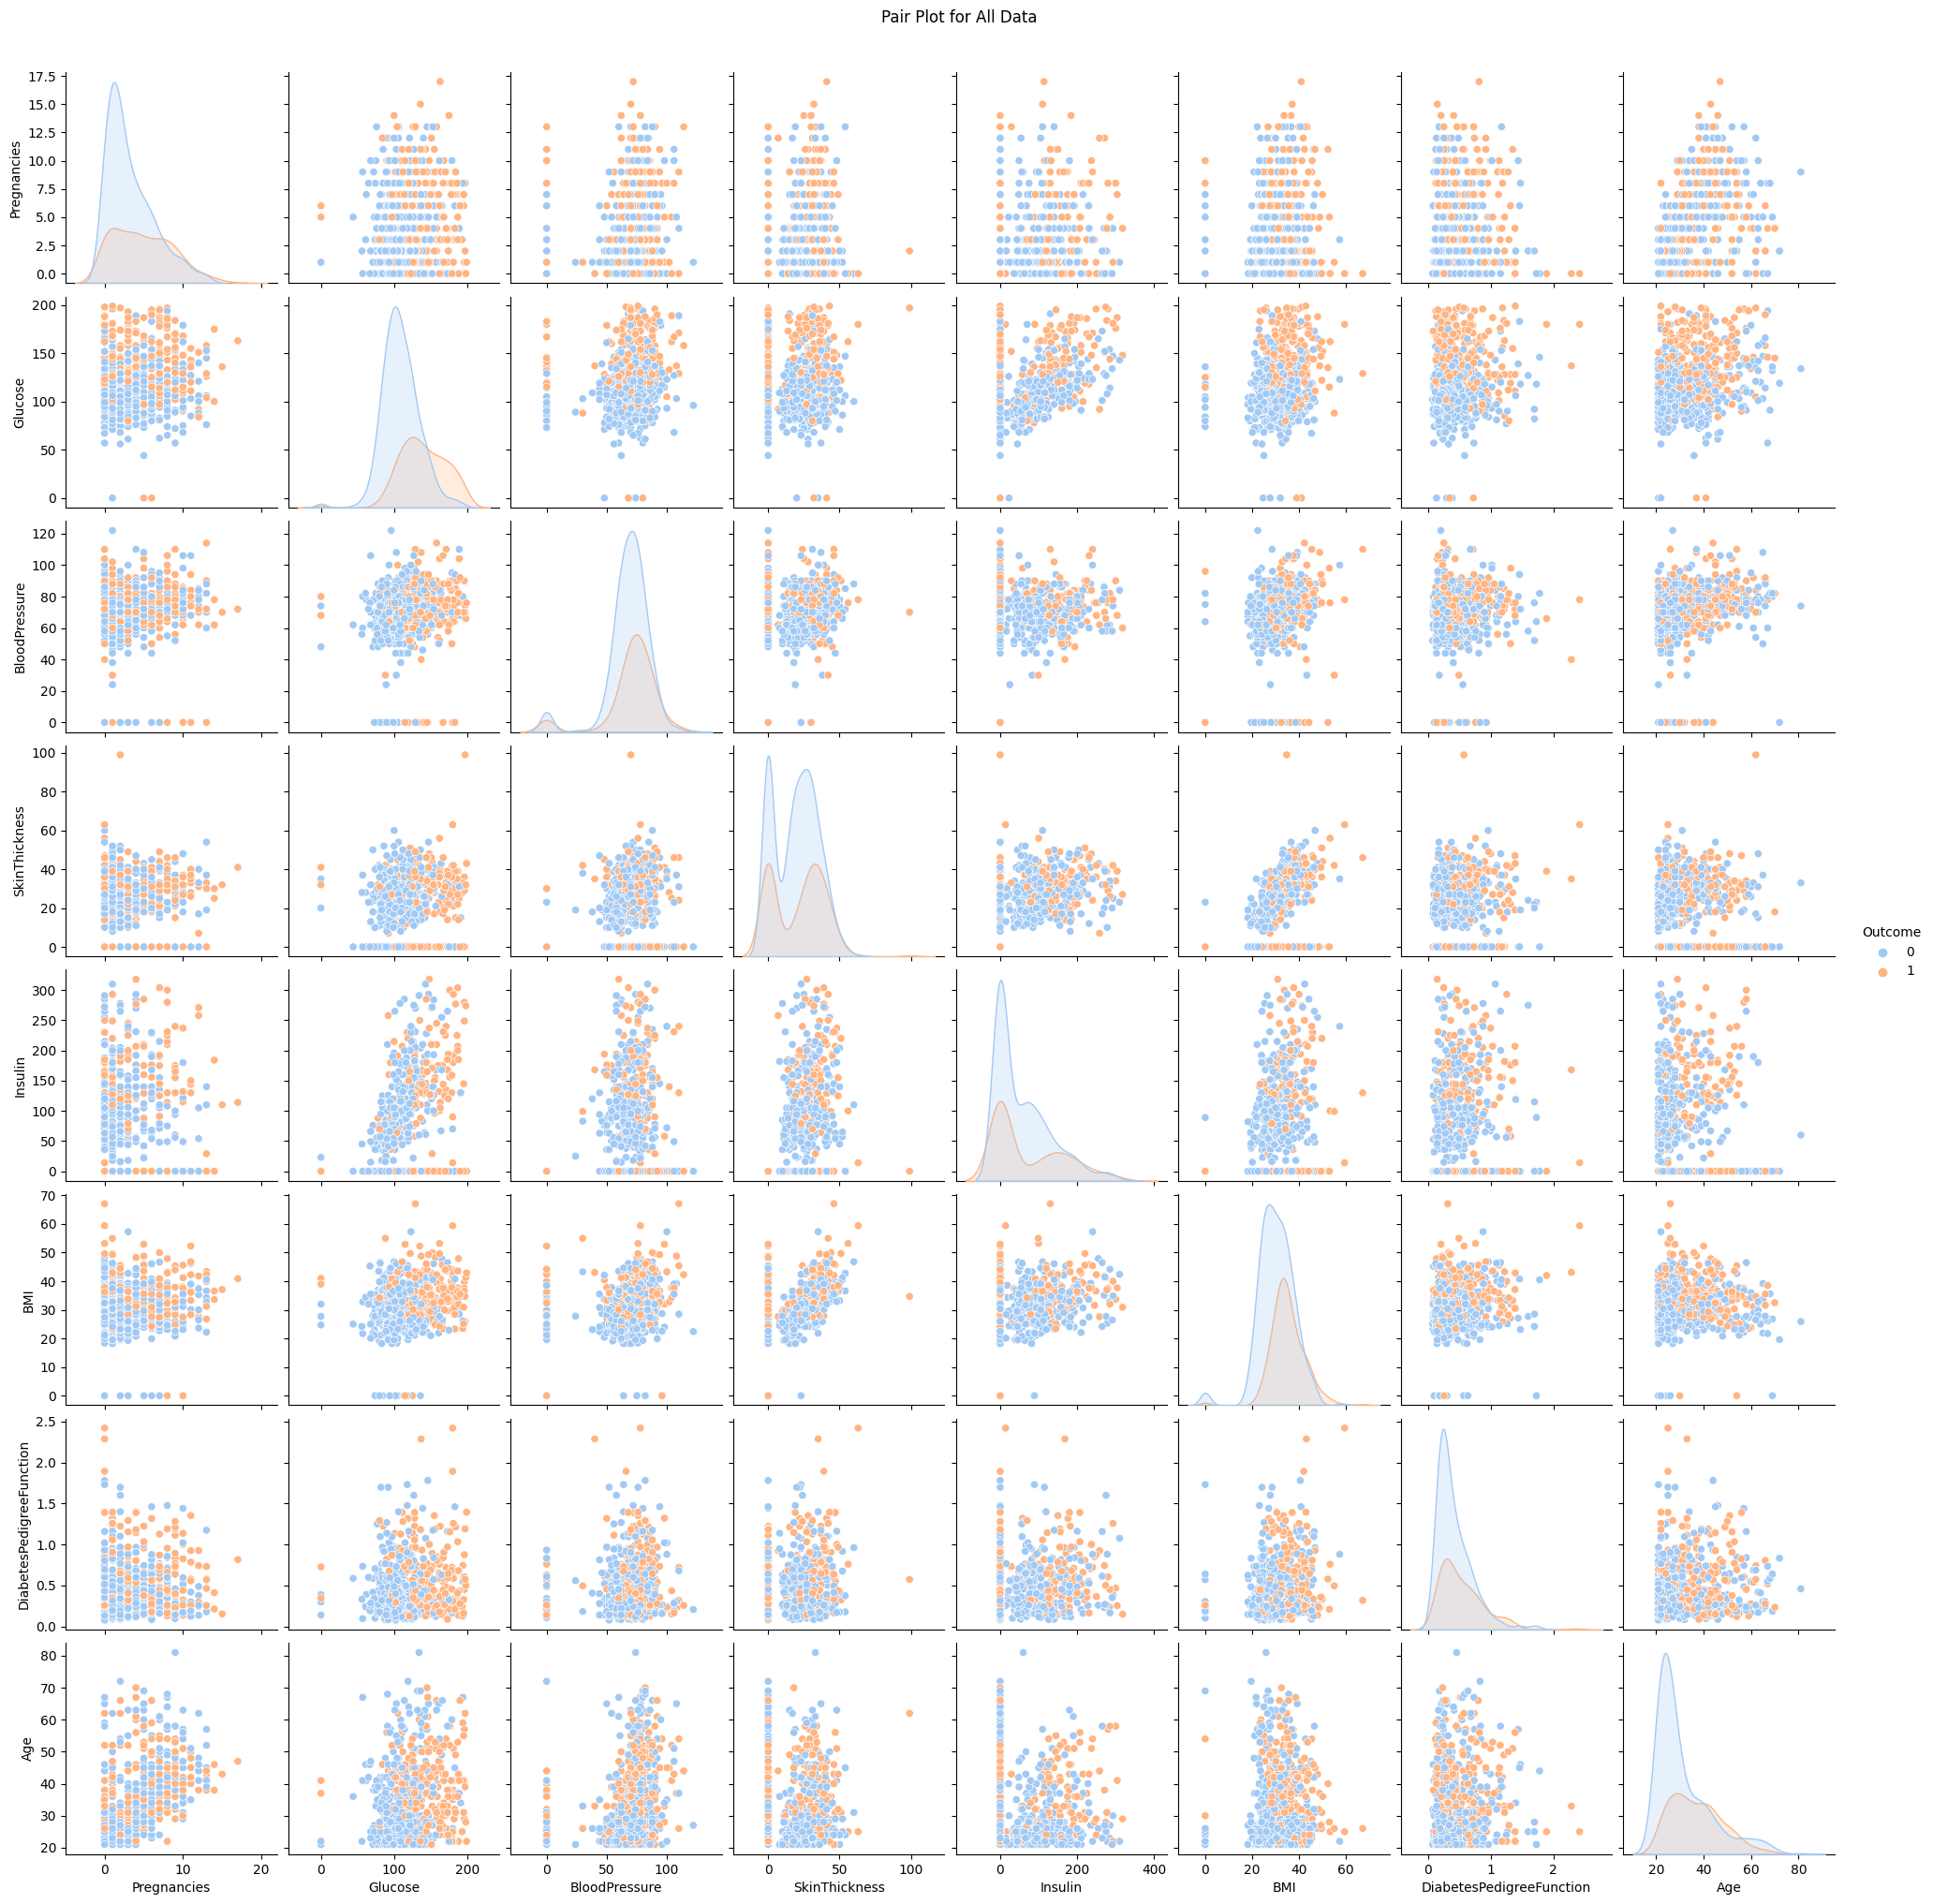

In [29]:
plt.figure(figsize=(15, 15))
sns.pairplot(data, hue='Outcome', palette='pastel', diag_kind='kde')
plt.suptitle('Pair Plot for All Data', y=1.02)
plt.show()

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.145973       0.141183      -0.086904   
Glucose                      0.145973  1.000000       0.157764       0.012172   
BloodPressure                0.141183  0.157764       1.000000       0.204248   
SkinThickness               -0.086904  0.012172       0.204248       1.000000   
Insulin                     -0.097015  0.219678       0.104340       0.486500   
BMI                          0.022434  0.212414       0.281522       0.379985   
DiabetesPedigreeFunction    -0.036690  0.113037       0.039816       0.173589   
Age                          0.540206  0.277492       0.241986      -0.122144   
Outcome                      0.223300  0.464128       0.064360       0.054106   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.097015  0.022434                 -0.036690   
Glucose                   0.219678  0.212

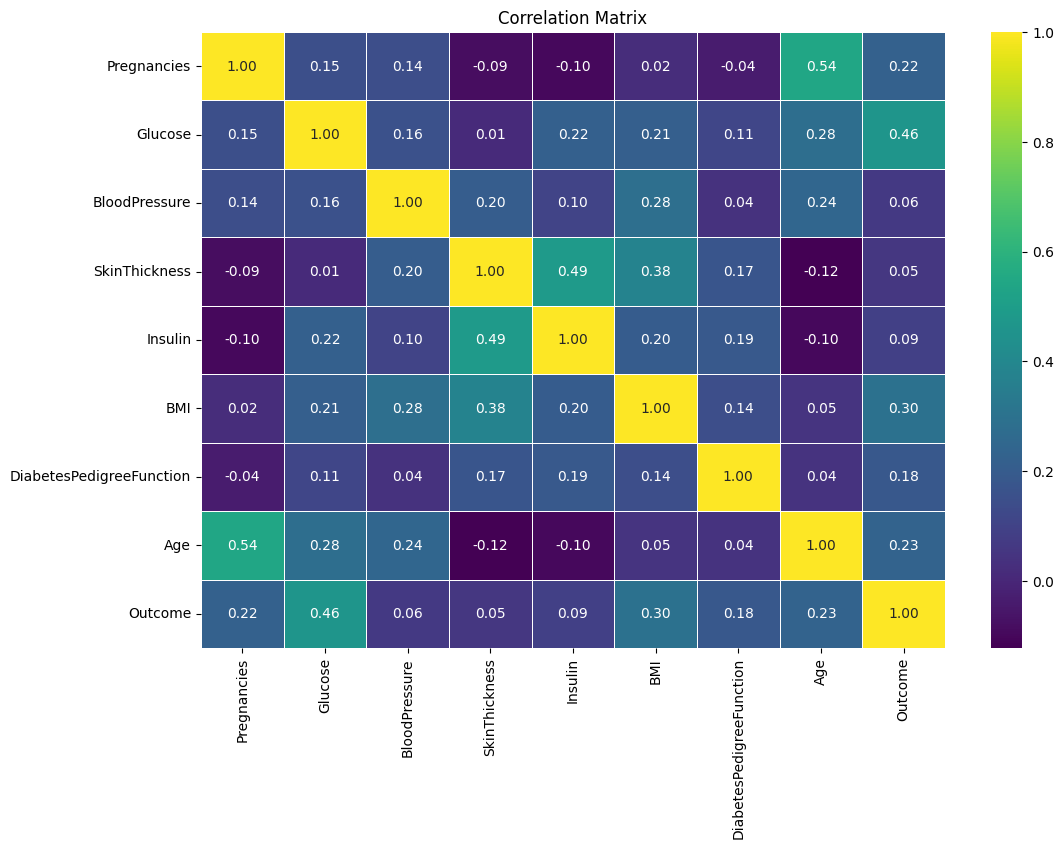

In [30]:
correlation_matrix = data.corr()
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

TRAINING THE MODEL WITH THE HELP OF
TRAIN TEST SPLIT

In X all the independent variables are stored
In Y the predictor variable("OUTCOME") is stored.
Train-test split is a technique used in machine learning to assess model performance. It divides the dataset into a training set and a testing set, with a 0.3 test size indicating that 30% of the data is used for testing and 70% for training.

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Separate features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
# Predict on the testing set
y_pred = model.predict(X_test_scaled)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7482993197278912

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        99
           1       0.66      0.48      0.55        48

    accuracy                           0.75       147
   macro avg       0.72      0.68      0.69       147
weighted avg       0.74      0.75      0.74       147


Confusion Matrix:
[[87 12]
 [25 23]]


In [32]:
from sklearn.neighbors import KNeighborsClassifier
# Create and train the KNN classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
# Predict on the testing set
y_pred_knn = knn_model.predict(X_test_scaled)
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Model Accuracy:", accuracy_knn)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


KNN Model Accuracy: 0.6870748299319728

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        99
           1       0.53      0.42      0.47        48

    accuracy                           0.69       147
   macro avg       0.63      0.62      0.62       147
weighted avg       0.67      0.69      0.68       147


Confusion Matrix:
[[81 18]
 [28 20]]


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Model Accuracy:", accuracy_dt)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Model Accuracy: 0.7210884353741497

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.57      0.60      0.59        48

    accuracy                           0.72       147
   macro avg       0.69      0.69      0.69       147
weighted avg       0.73      0.72      0.72       147


Confusion Matrix:
[[77 22]
 [19 29]]


In [34]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']